In [121]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [122]:
data = xr.open_dataset('Canada.nc')
data


<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 356, lat: 74)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 13:37:07 2023: cdo mergetime PERSIANN_Canada_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [123]:
da=ds.precip.sel(lon=-106.3, lat=56.1, method='nearest')
da1=da.sel(datetime=slice('2001','2010'))
da1

<xarray.DataArray 'precip' (datetime: 3652)>
array([0.24, 0.5 , 1.38, ..., 0.  , 0.  , 0.22], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 -106.2
    lat       float32 56.0
Attributes:
    grid_mapping:  crs

In [124]:
ds= data.where(data !=-99.0)
ds

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 74, lon: 356)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 13:37:07 2023: cdo mergetime PERSIANN_Canada_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# QUESTION 1 

In [125]:
# Resample to monthly time steps and calculate monthly totals
monthly_totals = da1.resample(datetime='M').sum('datetime')

In [126]:
# Calculate monthly climatology (average of each month across all years)
climatology = monthly_totals.groupby('datetime.month').mean('datetime')

# QUESTION 2


In [127]:
# Resample to annual time steps and calculate annual totals
annual_totals = da1.resample(datetime='y').sum('datetime') 

In [128]:
# Calculate the mean annual precipitation over the spatial dimensions (latitude and longitude)
annual_mean = annual_totals.groupby('datetime.year').mean('datetime')

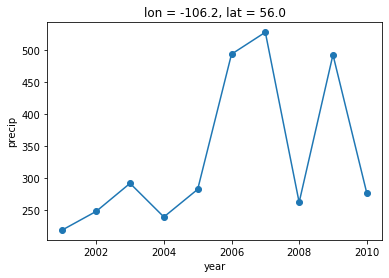

In [129]:
annual_mean.plot(marker='o')

In [130]:
da=ds.sel(lon=-106.3, lat=56.3 ,method='nearest')
ds1=da.sel(datetime=slice('2001','2010'))
ds1

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 -106.2
    lat       float32 56.25
Data variables:
    crs       float64 1.0
    precip    (datetime) float32 0.0 0.5 2.46 2.86 0.59 ... 0.0 0.0 0.0 0.22
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 13:37:07 2023: cdo mergetime PERSIANN_Canada_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# QUESTION 3

# NUMBER OF DRY AND WET DAYS

In [131]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
dry_days = ds1.where(ds1['precip'] < 1).precip#count(dim='datetime')
wet_days = ds1.where(ds1['precip'] >= 1).precip#count(dim='datetime')
wet_days

<xarray.DataArray 'precip' (datetime: 3652)>
array([ nan,  nan, 2.46, ...,  nan,  nan,  nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 -106.2
    lat       float32 56.25
Attributes:
    grid_mapping:  crs

In [132]:
# Plot spatial visualization of dry and wet days
#dry_days.plot()
#plt.show()
#wet_days.plot()
#plt.show()

# AVERAGE MONTHLY AND ANNUAL WET AND DRY

In [133]:
# Plot timeseries of monthly and annual dry/wet days
mondry_mean = dry_days.groupby('datetime.month').mean('datetime')
monwet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')

# TIMESERIES PLOTS ON AVERAGE AND MONTHLY WET AND DRY DAYS

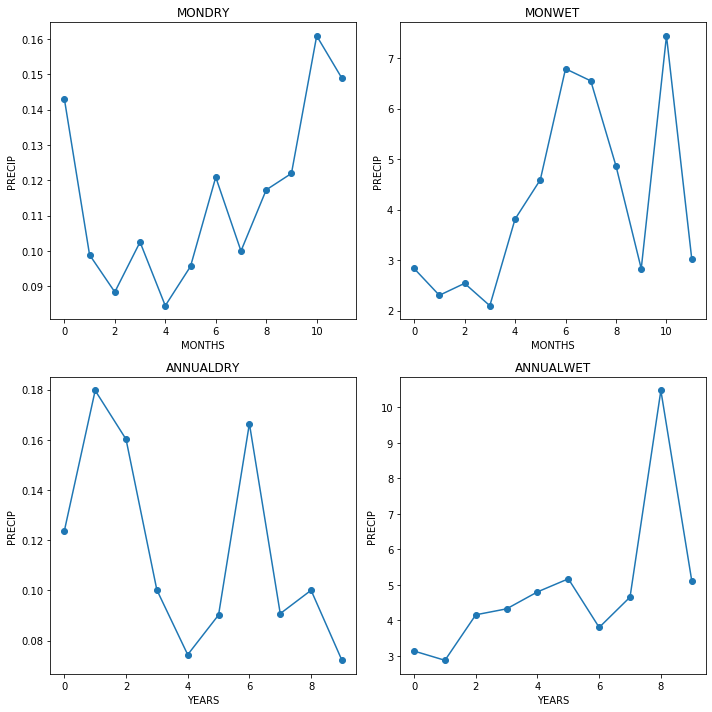

In [134]:
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(mondry_mean, marker='o') 
axs[0, 0].set_title("MONDRY")
axs[0, 0].set_ylabel("PRECIP")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(monwet_mean, marker='o') 
axs[0, 1].set_title("MONWET")
axs[0, 1].set_ylabel("PRECIP")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(annualdry_mean, marker='o')
axs[1, 0].set_title("ANNUALDRY")
axs[1, 0].set_ylabel("PRECIP")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(annualwet_mean, marker='o')
axs[1, 1].set_title("ANNUALWET")
axs[1, 1].set_ylabel("PRECIP")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout()

# spatial plot

In [135]:
dw= data.where(data !=-99.0)
dw

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 74, lon: 356)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 13:37:07 2023: cdo mergetime PERSIANN_Canada_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [136]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
dry_days = dw.where(dw['precip'] < 1).precip#count(dim='datetime')
wet_days = dw.where(dw['precip'] >= 1).precip#count(dim='datetime')
wet_days

<xarray.DataArray 'precip' (datetime: 3652, lat: 74, lon: 356)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Attributes:
    grid_mapping:  crs

In [137]:
mondry_mean = dry_days.groupby('datetime.month').mean('datetime')
monwet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')


/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


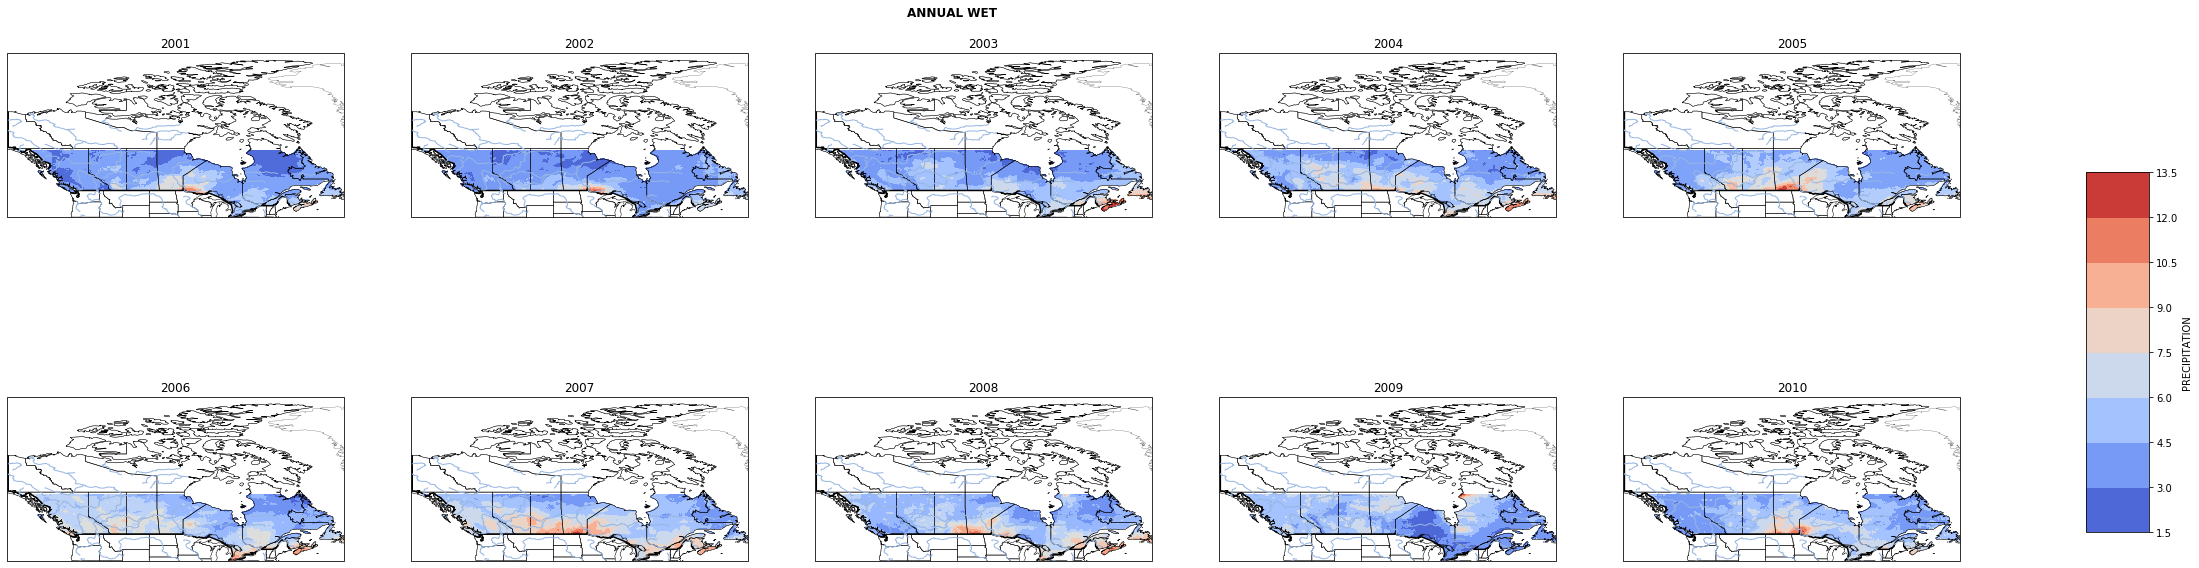

In [138]:
fig,ax=plt.subplots(2,5,figsize=(35,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(annualwet_mean.lon, annualwet_mean.lat, annualwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.2,top=1.00)
plt.suptitle('ANNUAL WET', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


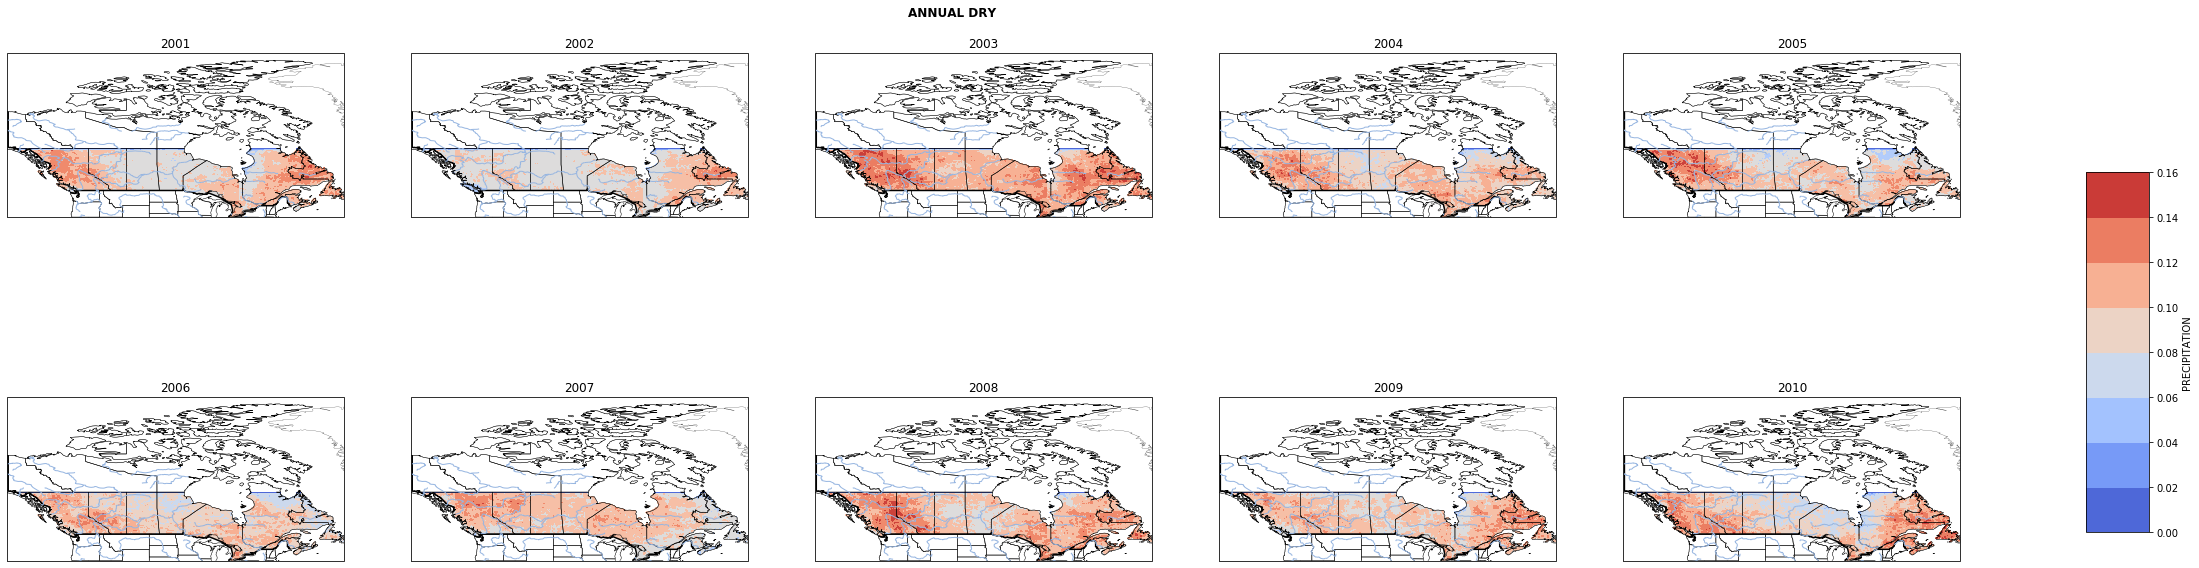

In [139]:
fig,ax=plt.subplots(2,5,figsize=(35,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(annualdry_mean.lon, annualdry_mean.lat, annualdry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.2,top=1.00)
plt.suptitle('ANNUAL DRY', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


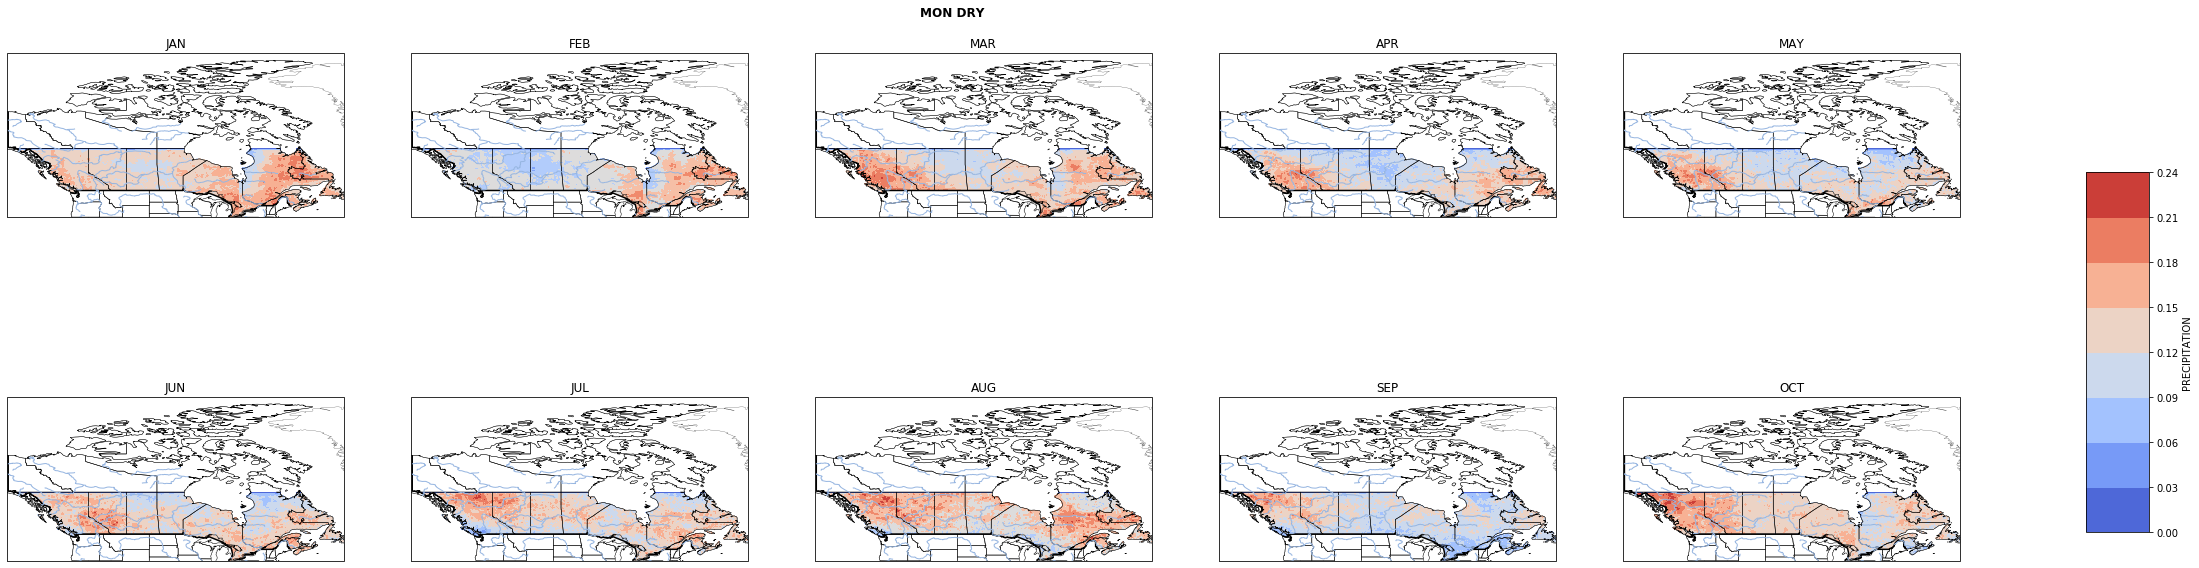

In [140]:
fig,ax=plt.subplots(2,5,figsize=(35,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(mondry_mean.lon, mondry_mean.lat, mondry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.2,top=1.00)
plt.suptitle('MON DRY', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


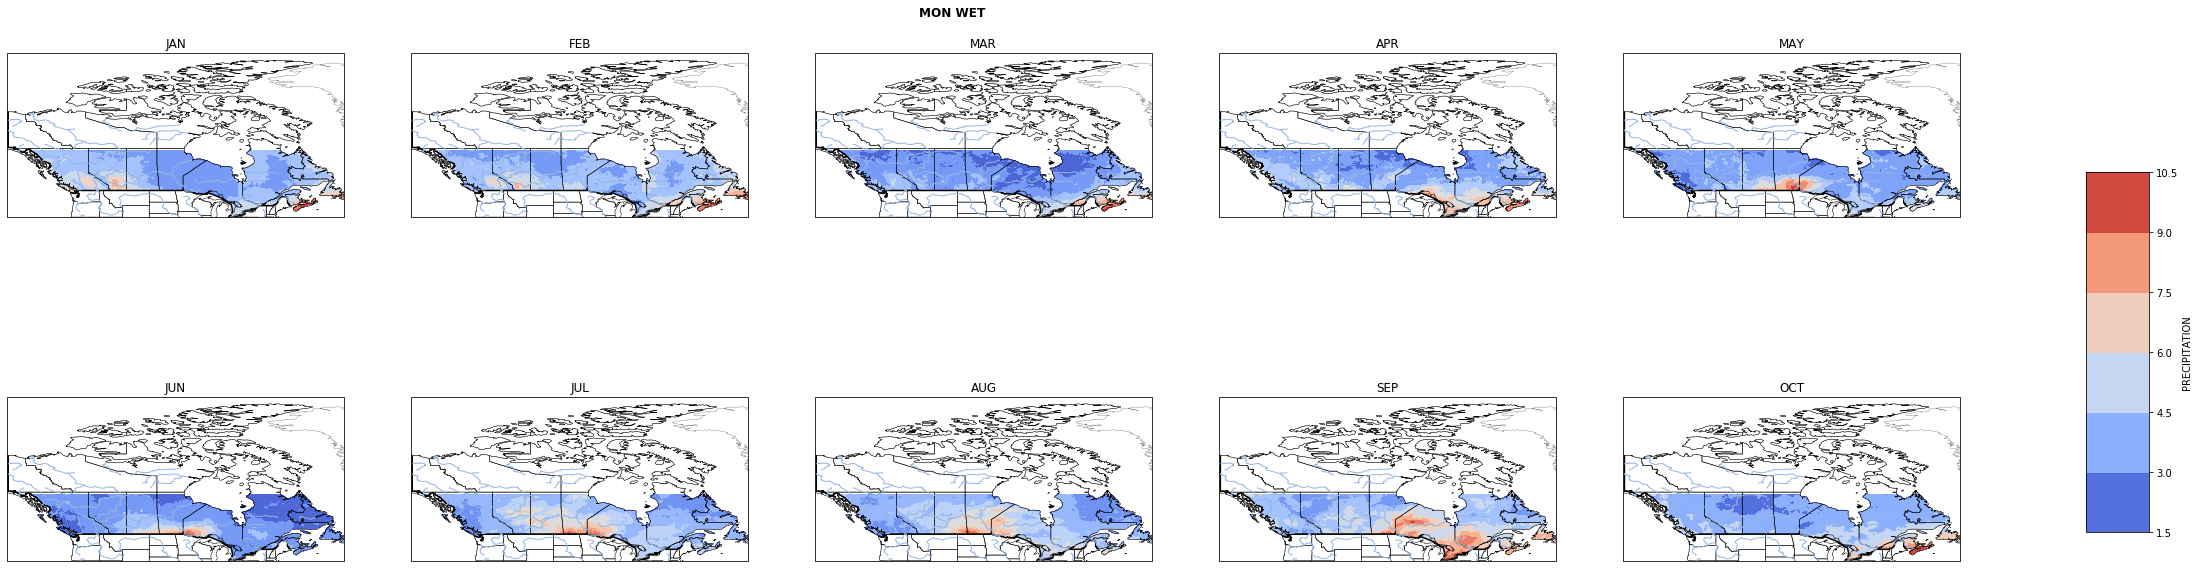

In [141]:
fig,ax=plt.subplots(2,5,figsize=(35,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(monwet_mean.lon, monwet_mean.lat, monwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.2,top=1.00)
plt.suptitle('MON WET', fontweight='bold')

plt.show()

In [142]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
extreme_dry_days = ds1.where(ds1['precip'] > 10).precip#count(dim='datetime')
extreme_wet_days = ds1.where(ds1['precip'] > 20).precip#count(dim='datetime')
extreme_wet_days

<xarray.DataArray 'precip' (datetime: 3652)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 -106.2
    lat       float32 56.25
Attributes:
    grid_mapping:  crs

In [143]:
extreme_mondry_mean = extreme_dry_days.groupby('datetime.month').mean('datetime')
extreme_monwet_mean = extreme_wet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extreme_dry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extreme_wet_days.groupby('datetime.year').mean('datetime')

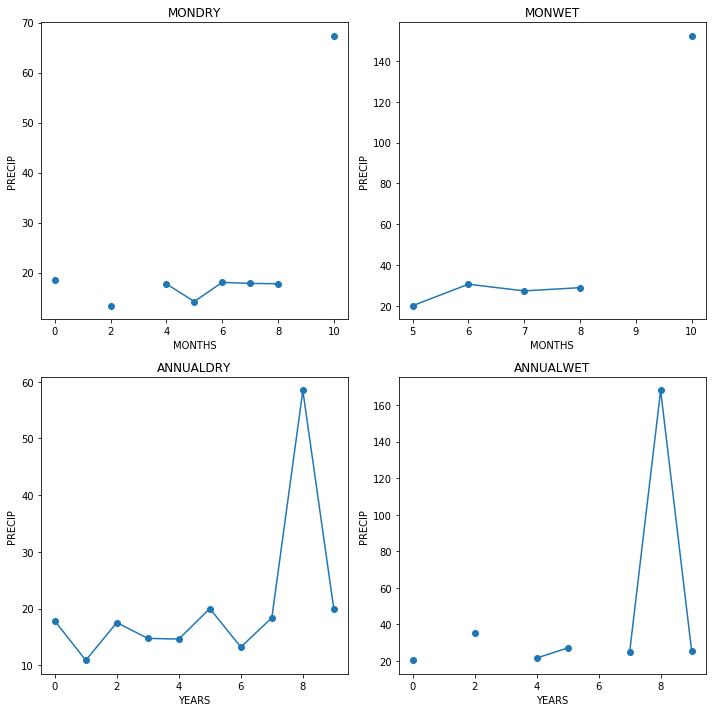

In [144]:
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(extreme_mondry_mean, marker='o') 
axs[0, 0].set_title("MONDRY")
axs[0, 0].set_ylabel("PRECIP")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(extreme_monwet_mean, marker='o') 
axs[0, 1].set_title("MONWET")
axs[0, 1].set_ylabel("PRECIP")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(extreme_annualdry_mean, marker='o')
axs[1, 0].set_title("ANNUALDRY")
axs[1, 0].set_ylabel("PRECIP")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(extreme_annualwet_mean, marker='o')
axs[1, 1].set_title("ANNUALWET")
axs[1, 1].set_ylabel("PRECIP")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 



In [145]:
dw= data.where(data !=-99.0)
dw

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 74, lon: 356)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 13:37:07 2023: cdo mergetime PERSIANN_Canada_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [146]:
extremedry_days = dw.where(dw['precip'] > 10).precip#count(dim='datetime')
extremewet_days = dw.where(dw['precip'] > 20).precip#count(dim='datetime')
extremewet_days


<xarray.DataArray 'precip' (datetime: 3652, lat: 74, lon: 356)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -141.2 -141.0 -140.8 -140.5 ... -53.0 -52.75 -52.5
  * lat       (lat) float32 60.0 59.75 59.5 59.25 59.0 ... 42.5 42.25 42.0 41.75
Attributes:
    grid_mapping:  crs

In [147]:
extreme_mondry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extreme_monwet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


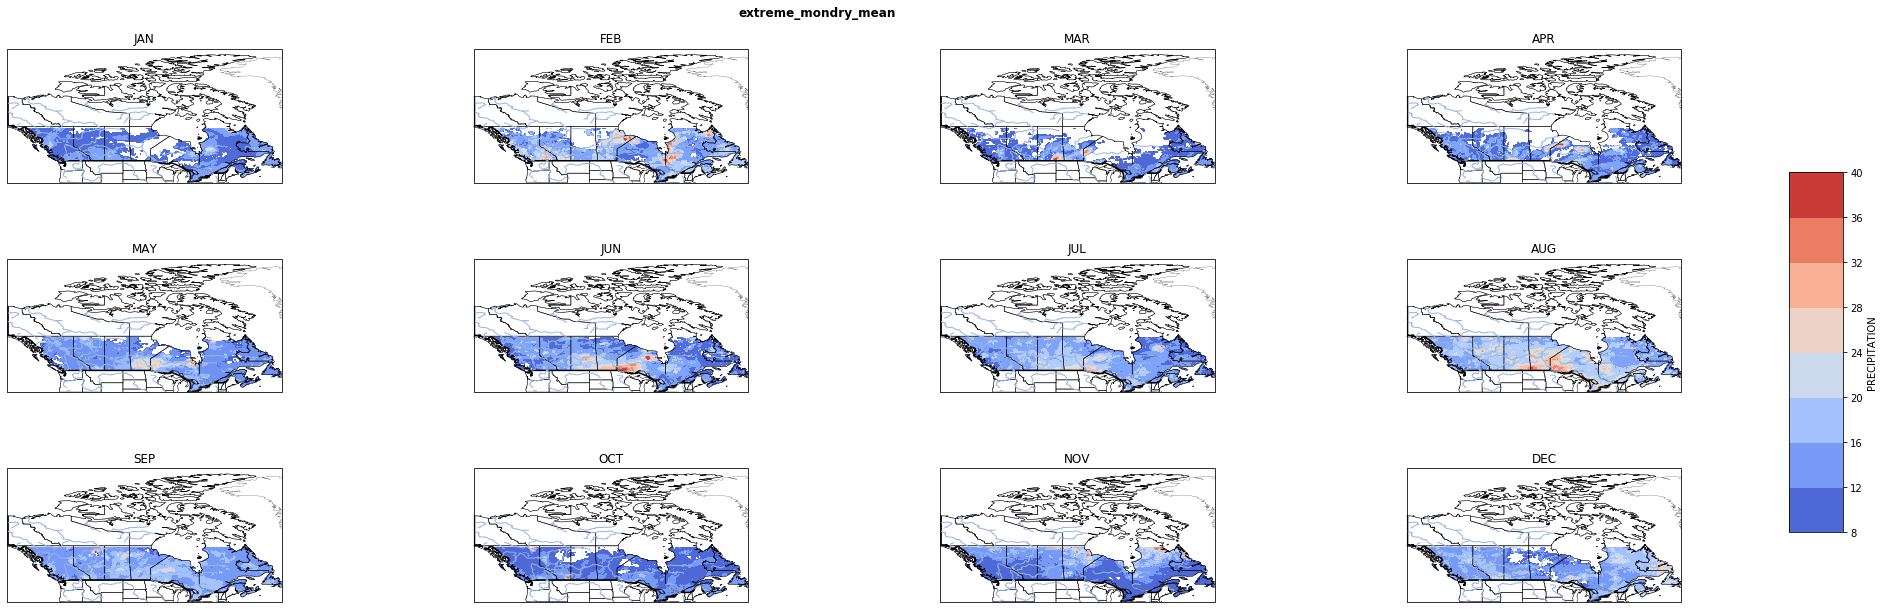

In [148]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_mondry_mean.lon, extreme_mondry_mean.lat, extreme_mondry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.7,top=0.95)
plt.suptitle('extreme_mondry_mean', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


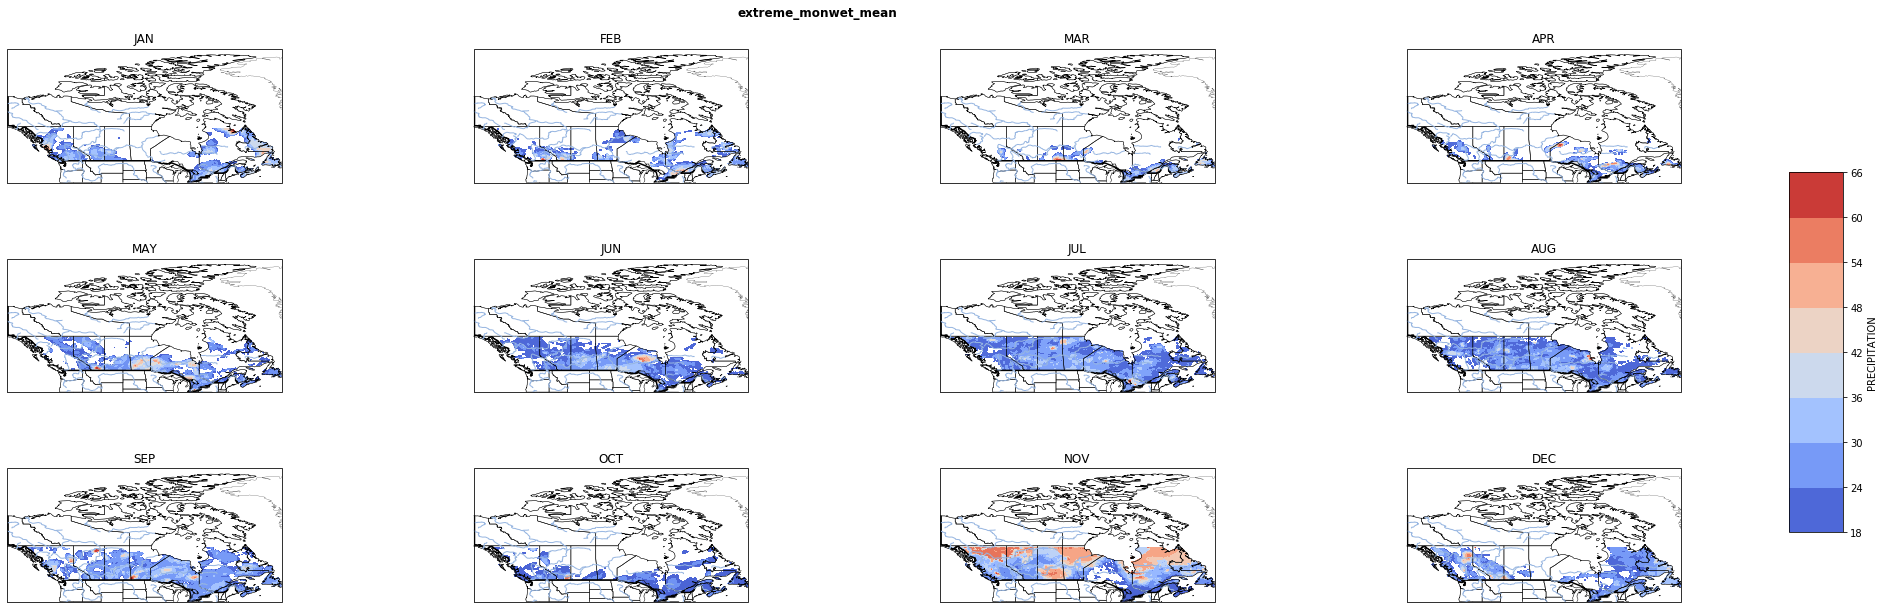

In [150]:
fig,ax=plt.subplots(3,4,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_monwet_mean.lon, extreme_monwet_mean.lat, extreme_monwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.7,top=0.95)
plt.suptitle('extreme_monwet_mean', fontweight='bold')

plt.show()

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


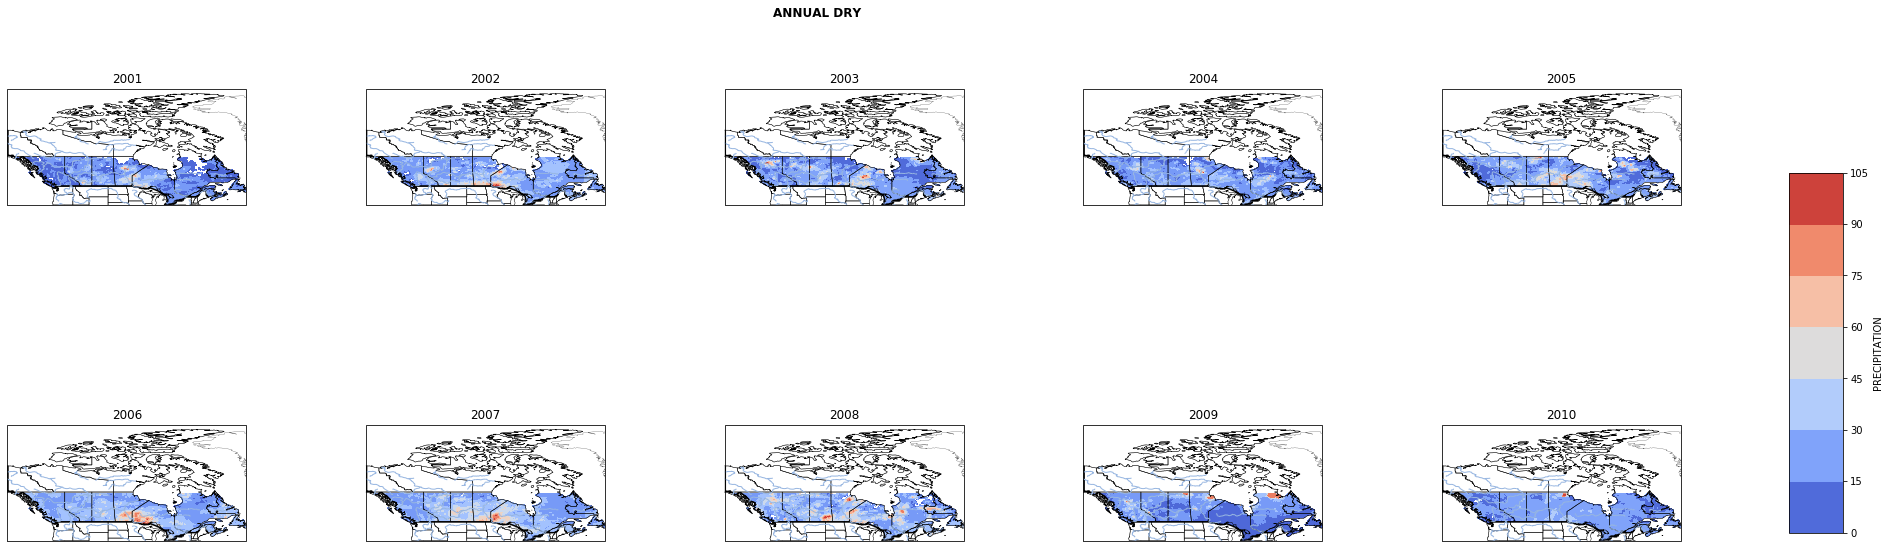

In [151]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_annualdry_mean.lon, extreme_annualdry_mean.lat, extreme_annualdry_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL DRY', fontweight='bold')

plt.show()
    

/home/peterlyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


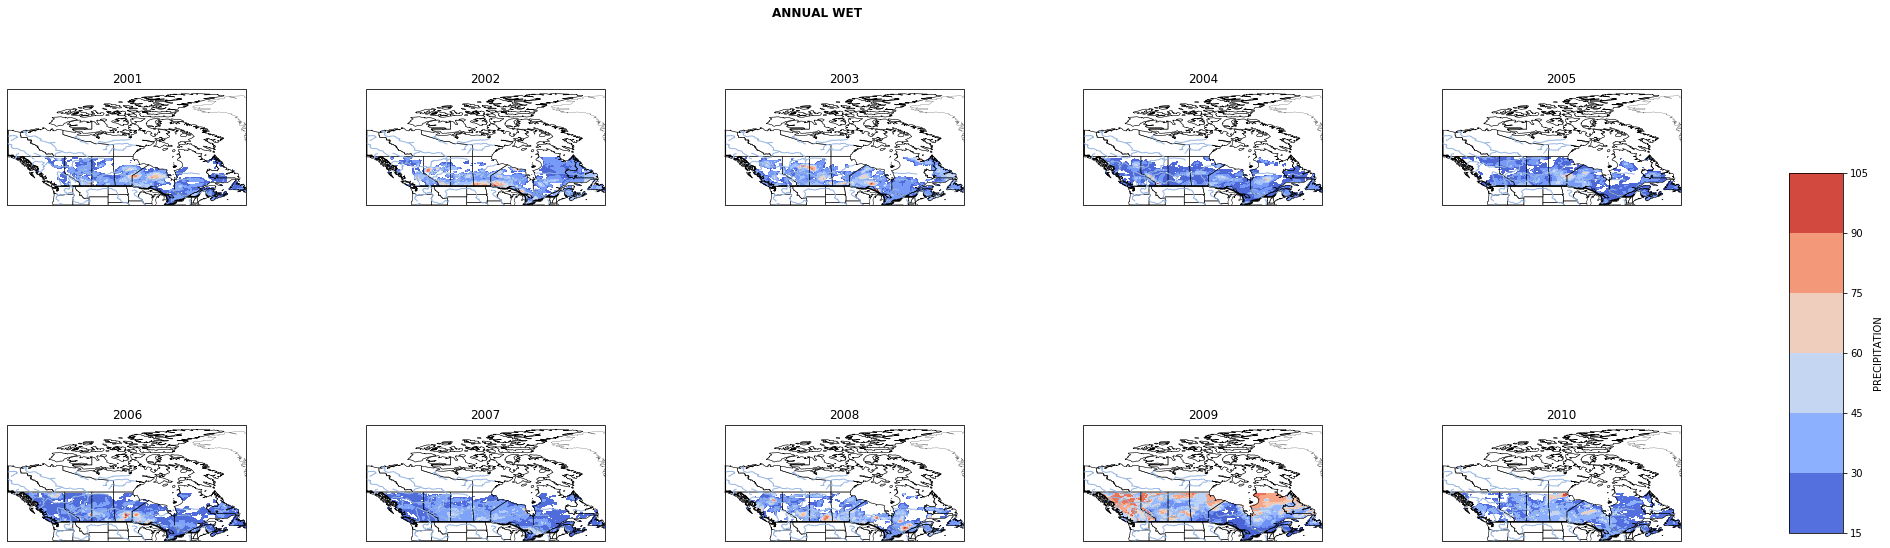

<Figure size 432x288 with 0 Axes>

In [155]:
fig,ax=plt.subplots(2,5,figsize=(30,10),
                   subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
names_of_months=["2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-53,-141.25,42,83])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_annualwet_mean.lon, extreme_annualwet_mean.lat, extreme_annualwet_mean[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION')
fig.subplots_adjust(wspace=0.5,top=0.98)
plt.suptitle('ANNUAL WET', fontweight='bold')

plt.show()
plt.savefig('annual wet.png')
    